In [86]:
import pandas as pd
import sqlite3

con = sqlite3.connect('../../datasets/checking-logs.sqlite')

## run a query that gets the `datetime` from the `pageviews` table, selecting only the `users` and not the `admins`

In [87]:
df = pd.read_sql_query(
    '''
    SELECT timestamp AS commits
    FROM checker
    WHERE uid LIKE 'user_%'
    ''',
    con,
    parse_dates=['commits'],
)
df['weekday'] = df['commits'].apply(lambda x: 'weekend' if x.dayofweek > 4 else 'working_day')
df['hour'] = df['commits'].dt.hour
df['date'] = df['commits'].dt.date

daily_commits = df.groupby(['date', 'weekday', 'hour']).size().reset_index(name='count')
average_commits = daily_commits.groupby(['weekday', 'hour'])['count'].mean().unstack().T
average_commits


weekday,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
3,1.000000,2.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


## using Pandas method `.plot()`, create a graph
* the size of the font should be 8
* the size of the figure is (15,8)
* the graph must have the title Views per day
* notice the rotation of xticks on the graph below

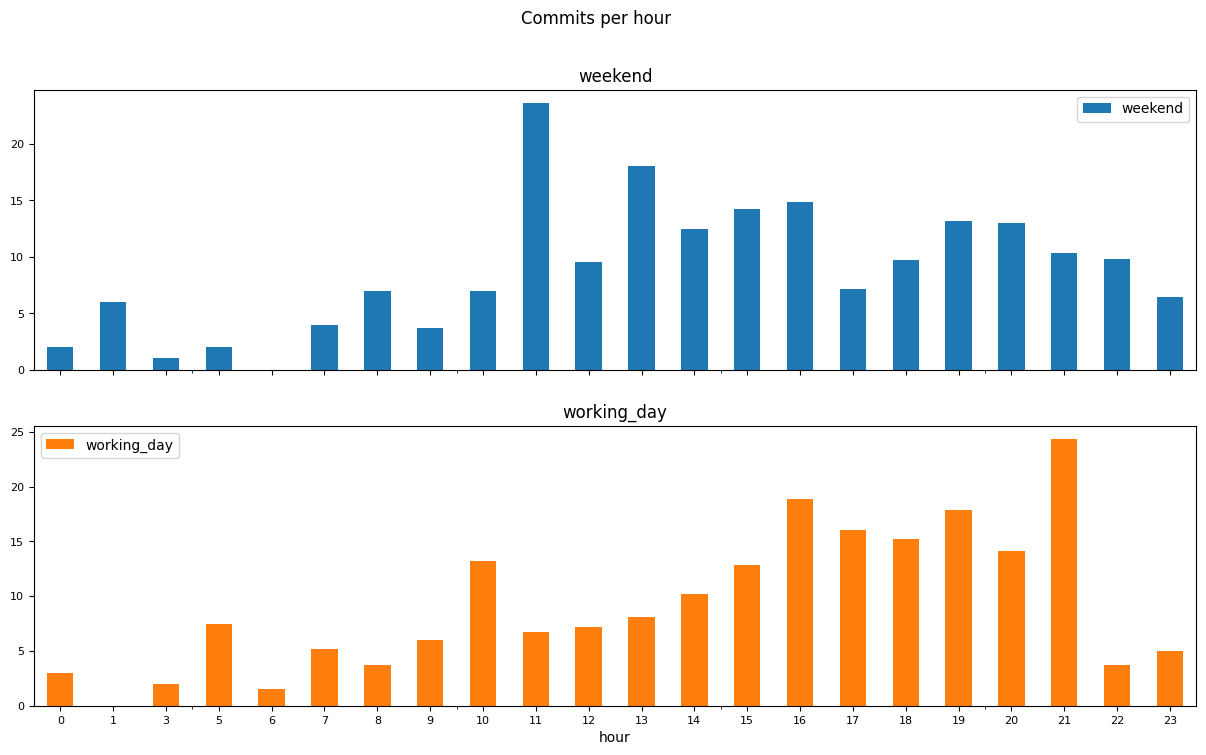

In [88]:
ax =average_commits.plot(
    kind='bar',
    subplots=True,
    fontsize=8,
    figsize=(15, 8),
    title='Commits per hour',
    rot=0,
)


## Is the dynamic different on working days and weekends

Yes. 
* hour when the number of commits is the largest during working days is 21
* hour when the number of commits is the largest during weekend is 11

In [89]:
con.close()